In [1]:
import torch
import numpy as np

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.train import prepare_training_data, train
from src.predict import predict
from src import UNet

In [4]:
n_epochs = 40
lr = 0.0005
batch_size = 3
weight_decay = 0.0001
random_state = np.random.RandomState(0)

In [5]:
train_loader, valid_loader = prepare_training_data(
    train_size=0.8, 
    batch_size=batch_size, 
    random_state=random_state)

In [6]:
train(train_loader, 
      valid_loader, 
      resume=False, 
      n_epochs=n_epochs, 
      lr=lr, 
      weight_decay=weight_decay, 
      loss_type='soft_dice')

cuda:0
Epoch: 1
[1, 5] loss: 0.823667
[1, 10] loss: 0.770611
[1, 15] loss: 0.767914
[1, 20] loss: 0.749156
[1, 25] loss: 0.726460
[1, 30] loss: 0.714097
[1, 35] loss: 0.709269
[1, 40] loss: 0.695275
[1, 45] loss: 0.682974
[1, 50] loss: 0.673764
[1, 55] loss: 0.670565
Epoch: 2
[2, 5] loss: 0.640237
[2, 10] loss: 0.611474
[2, 15] loss: 0.630929
[2, 20] loss: 0.617242
[2, 25] loss: 0.598934
[2, 30] loss: 0.588180
[2, 35] loss: 0.601162
[2, 40] loss: 0.601156
[2, 45] loss: 0.583378
[2, 50] loss: 0.566608
[2, 55] loss: 0.572595
Epoch: 3
[3, 5] loss: 0.531617
[3, 10] loss: 0.492292
[3, 15] loss: 0.521102
[3, 20] loss: 0.512341
[3, 25] loss: 0.491247
[3, 30] loss: 0.482014
[3, 35] loss: 0.488108
[3, 40] loss: 0.479445
[3, 45] loss: 0.462196
[3, 50] loss: 0.445451
[3, 55] loss: 0.444117
Epoch: 4
[4, 5] loss: 0.405925
[4, 10] loss: 0.382746
[4, 15] loss: 0.400937
[4, 20] loss: 0.395149
[4, 25] loss: 0.383886
[4, 30] loss: 0.374864
[4, 35] loss: 0.367304
[4, 40] loss: 0.367999
[4, 45] loss: 0.35

[31, 25] loss: 0.216986
[31, 30] loss: 0.219953
[31, 35] loss: 0.210313
[31, 40] loss: 0.219896
[31, 45] loss: 0.212653
[31, 50] loss: 0.205040
[31, 55] loss: 0.210652
Epoch: 32
[32, 5] loss: 0.208529
[32, 10] loss: 0.206962
[32, 15] loss: 0.210139
[32, 20] loss: 0.206236
[32, 25] loss: 0.213998
[32, 30] loss: 0.218133
[32, 35] loss: 0.206482
[32, 40] loss: 0.217792
[32, 45] loss: 0.210315
[32, 50] loss: 0.203529
[32, 55] loss: 0.209468
Epoch: 33
[33, 5] loss: 0.209395
[33, 10] loss: 0.207149
[33, 15] loss: 0.211864
[33, 20] loss: 0.208525
[33, 25] loss: 0.216222
[33, 30] loss: 0.220832
[33, 35] loss: 0.210557
[33, 40] loss: 0.221817
[33, 45] loss: 0.213389
[33, 50] loss: 0.204834
[33, 55] loss: 0.211420
Epoch: 34
[34, 5] loss: 0.209033
[34, 10] loss: 0.209383
[34, 15] loss: 0.209885
[34, 20] loss: 0.207647
[34, 25] loss: 0.216011
[34, 30] loss: 0.219281
[34, 35] loss: 0.208834
[34, 40] loss: 0.217254
[34, 45] loss: 0.210588
[34, 50] loss: 0.201552
[34, 55] loss: 0.208199
Epoch: 35
[35

In [5]:
check_point = torch.load('../check_point/check_point')

In [6]:
model = UNet(in_channels=3, padding=(117, 118, 108, 108))
for k,v in check_point.items():
    print(k)
model.load_state_dict(check_point['model_state_dict'])

epoch
model_state_dict
optimizer_state_dict
loss_state_dict


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [7]:
predict(model=model)

(117, 118, 108, 108)
Predicted image 1 saved
Predicted image 2 saved
Predicted image 3 saved
Predicted image 4 saved
Predicted image 5 saved
Predicted image 6 saved
Predicted image 7 saved
Predicted image 8 saved
Predicted image 9 saved
Predicted image 10 saved
Predicted image 11 saved
Predicted image 12 saved
Predicted image 13 saved
Predicted image 14 saved
Predicted image 15 saved
Predicted image 16 saved
Predicted image 17 saved
Predicted image 18 saved
Predicted image 19 saved
Predicted image 20 saved


In [8]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

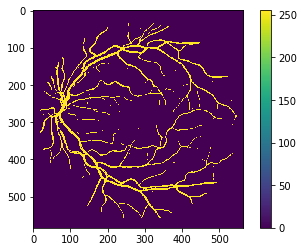

In [9]:
img = Image.open(os.path.join(module_path, 'data/predict/1.png'))
plt.imshow(img)
plt.colorbar()
plt.show()